#  House Price Estimation
---

## Using a Comprehensive Feature-Set

Several models have been built previously with the goal of predicting house prices. However, every one of these models utilizes a <u>different set of variables</u> in order to derive those predictions. *Some of these datasets utilize very few and high-level home characteristics*. The data available in the Ames Housing Dataset presents an opportunity to create a prediction model based on a more comprehensive set of variables. It contains **79 explanatory variables describing (almost) every aspect of residential homes.**

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But **many similarly unexpected factors play an important role in predicting the price of a house.** This dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. Furthermore, a model built from this extended and up-to-date feature-set could be scaled to predict house prices accross different real-estate markets. There is a clear need for a modernized and expanded version of the often cited Boston Housing dataset. 

## Advanced Linear Regression Techniques

With 35+ numeric features and plenty of missing values, dutiful data handling is necessary. High-dimensionality is difficult to visualize, summarize and present with clarity. Some of the most difficult regression techniques involve dealing with non-linearity and understanding assumptions such as homoscedasticity. Lastly, fine-tunning a model with such lengthly pre-processing requires a good strategy. I plan on performing a gridsearch not limited to the algorithm's hyperparameters, but one that optimizes for pre-processing steps as well. This will involve creating a pipeline object and comparing among several data-handling configurations.

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

train = pd.read_csv('data/train.csv')
sns.set(style='darkgrid')

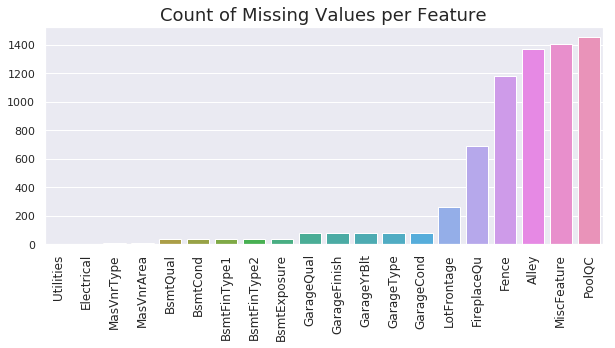

In [29]:
# Make a barplot of missing values per feature
plt.figure(figsize=(10,4))
missing = train.isnull().sum().sort_values()[-20:]
sns.barplot(x=missing.index, y=missing.values)
plt.title('Count of Missing Values per Feature',fontsize=18)
plt.xticks(rotation=90,fontsize=12)
plt.show()

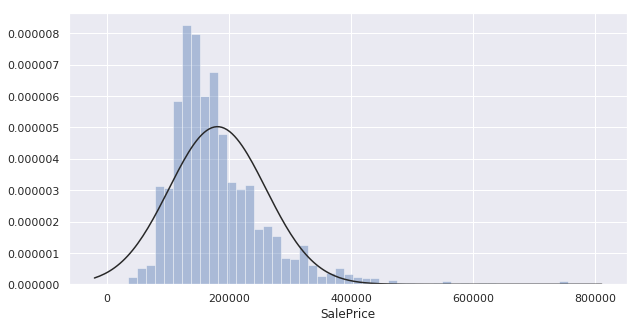

In [52]:
# Checking for normality
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'],kde=False,fit=stats.norm)
plt.show()

In [60]:
# Get quantitative and qualitative variables
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
quantitative.remove('SalePrice'); quantitative.remove('Id')


# 
anv = pd.DataFrame()
anv['feature'] = qualitative
pvals = []
for var in qualitative:
    groups = []
    for val in train[var].unique():
        group = train[train[var] == val]['SalePrice'].values
        groups.append(group)
    pval = stats.f_oneway(*groups)[1]
    pvals.append(pval)
anv['pval'] = pvals
anv.sort_values('pval',inplace=True)
anv.head()

,feature,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
30,KitchenQual,3.032213e-192
20,Foundation,5.791895e-91
27,HeatingQC,2.667062e-67


In [ ]:
a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)